# BRILLTagger
http://www.nltk.org/api/nltk.tag.html

In [171]:
import nltk

from nltk.tag import untag, RegexpTagger, BrillTaggerTrainer

In [170]:
tags = [ tag for (word, tag) in conll2002.tagged_words() ]
nltk.FreqDist(tags).max()

u'NC'

In [172]:
senteces = conll2002.tagged_sents()
len(senteces)

35651

In [173]:
training_data = senteces[:-100]
# baseline_data = senteces[-400:-100] #equivalent to CV data
gold_data = senteces[-100:]  #equivalent to test data
testing_data = [untag(s) for s in gold_data]

In [174]:
from nltk.tbl.template import Template
from nltk.tag.brill import Pos, Word
from nltk.tag import DefaultTagger

default_tagger = DefaultTagger('NC')

from nltk.tag import UnigramTagger

print "- Unigram Tagger"
unigram_tagger = UnigramTagger(training_data,backoff=default_tagger)

- Unigram Tagger


In [177]:
print "- Templates"
Template._cleartemplates() 
templates = [
    Template(Pos([-1])), 
    Template(Pos([-1]), Word([0])), 
    Template(Pos([-2])), 
    Template(Pos([-2]), Word([0])),
    Template(Pos([1])), 
]
print "- Creating Trainer"
tt = BrillTaggerTrainer(unigram_tagger, templates, trace=3)
print "- Begin Training"
tagger1 = tt.train(training_data, max_rules=40)
print "- Done."

- Templates
- Creating Trainer
- Begin Training
TBL train (fast) (seqs: 35551; tokens: 677085; tpls: 5; min score: 2; min acc: None)
Finding initial useful rules...
    Found 28432 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
91729420 2481671  | SP->Art if Pos:N@[1]
52905469 179  25  | Fc->Punc if Pos:N@[-1]
42734343  70   0  | Punc->Fp if Pos:NC@[-1] & Word:.@[0]
32873335  48   0  | Punc->Fp if Pos:NC@[-2] & Word:.@[0]
27262726   0   0  | Fc->Punc if Pos:V@[-1]
26592662   3 576  | SP->Art if Pos:Adj@[1]
18851888   3   0  | PR->CS if Pos:VMI@[-1] & Word:que@[0]
15431574  31   0  | Fpt->Punc if Pos:N@[-1]
14281428   0  10  | Art->Con

In [178]:
tagger1.evaluate(gold_data)

0.6780185758513931

In [ ]:
eagle_dict = {
    "ao": "Adjective (ordinal)",
    "aq": "Adjective (descriptive)",
    "cc": "Conjunction (coordinating)",
    "cs": "Conjunction (subordinating)",
    "da": "Determiner Article (definite)",
    "dd": "Determiner Demonstrative",
    "de":"Determiner Exclamative" ,
    "di": "Determiner Article (indefinite)",
    "dn": "Determiner Numeral",
    "dp": "Determiner Possessive",
    "dt": "Determiner Interrogative",
    "i": "Interjection",
    "nc": " Common noun",
    "np": "Proper noun",
    "p": "Pronoun Impersonal se",
    "pd": "Pronoun Demonstrative pronoun",
    "pe": "Pronoun Exclamative",
    "pi": "Pronoun Indefinite",
    "pn": "Numeral pronoun",
    "pp": "Personal pronoun",
    "pr": "Relative pronoun",
    "pt": "Interrogative pronoun",
    "px": "Possessive pronoun",
    "rg": "Adverb (general)",
    "rn": "Adverb (negating)",
    "sp": "Preposition",
    "va": "Verb (auxiliary)",
    "vm": "Verb (main)",
    "vs": "Verb (semiauxiliary)",
    "w": "Date",
    "z": "Numeral",
    "zm": "Numeral qualifier (currency)",
    "zu": "Numeral qualifier (other units)",
}


def eagle_to_human(tag_list):
    for word, tag in tag_list:
        human_tag = tag
        if tag[:2] in eagle_dict:
            human_tag = eagle_dict[tag[:2]]
        if (len(tag) == 1 or tag[1] == "0") and tag[0] in eagle_dict:
            human_tag = eagle_dict[tag[0]]
        print "%s -- %s" %(word, human_tag)

In [ ]:
raw = "El conductor del carro fue identificado como miguel perez"

eagle_to_human( tagger1.tag(raw.split()) )

# TEST with data

In [ ]:
import urllib2
import bs4 #beautiful soup

from datetime import datetime
import pandas as pd
import numpy as np

In [ ]:
articles = pd.read_csv("./files/articles.csv")
articles.shape

In [ ]:
content = articles.loc[1].content
soup = bs4.BeautifulSoup(content, 'html.parser')
print soup.get_text()

In [ ]:
raw = soup.get_text()
eagle_to_human( tagger1.tag(raw.split()) )

# Stanford Tagger

In [ ]:
from nltk.tag import StanfordNERTagger

st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz','./stanford-spanish-corenlp-2016-10-31-models.jar') 
st.tag(raw.split()) 

# Chunks

In [ ]:
cess_esp.sents()[1]

In [ ]:
cess_esp.parsed_sents()[1].draw()

# CONLL2002

In [2]:
from nltk.corpus import  conll2002

In [5]:
#conll2002.tagged_sents()[0]
# print conll2002.chunked_sents()[0]
conll2002.iob_sents()[0]

[(u'Sao', u'NC', u'B-LOC'),
 (u'Paulo', u'VMI', u'I-LOC'),
 (u'(', u'Fpa', u'O'),
 (u'Brasil', u'NC', u'B-LOC'),
 (u')', u'Fpt', u'O'),
 (u',', u'Fc', u'O'),
 (u'23', u'Z', u'O'),
 (u'may', u'NC', u'O'),
 (u'(', u'Fpa', u'O'),
 (u'EFECOM', u'NP', u'B-ORG'),
 (u')', u'Fpt', u'O'),
 (u'.', u'Fp', u'O')]

## Simple stupid test.... 
Try to use the iob_sents to find the Named Entity:

1. Extract features
   - First letter uppercase?
   - Begin of chunk
   - pos[-1] tag
   - pos[1] tag
   - pos in chunk
   - pos in sentence



In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [27]:
df = pd.DataFrame()
df.append(dfa)

,a,b
0,2,3
1,4,3
2,3,3


In [76]:
def get_df(sentences):

    
    s_id = []
    s_word = []
    s_tag = []
    s_iob =[]
    s_pos = []

    for sent_num in range(len(sentences)):
        sent = sentences[sent_num]
        for pos in range(len(sent)):
            word = sent[pos]
            s_id.append(sent_num)
            s_word.append(word[0])
            s_tag.append(word[1])
            s_iob.append(word[2])
            s_pos.append(pos)
        
    df = pd.DataFrame({
            "sentence": s_id,
            "word": s_word,
            "tag": s_tag,
            "iob": s_iob,
            "pos": s_pos
        })
    
    return df
sent_df = get_df(conll2002.iob_sents())

In [78]:
sent_df.tail()

,iob,pos,sentence,tag,word
678372,O,6,35650,Prep,uit
678373,O,7,35650,Art,de
678374,O,8,35650,N,wonderoogst
678375,O,9,35650,Num,1997
678376,O,10,35650,Punc,.


### Features

In [79]:
from sklearn.preprocessing import LabelEncoder

def get_features(base_df):
    df = pd.DataFrame()
    # iob
    le_iob = LabelEncoder()
    df.loc[:,"iob"] = le_iob.fit_transform(base_df.iob)
    print list(le_iob.classes_)

    #tag
    le_tag = LabelEncoder()
    df.loc[:,"tag"] = le_tag.fit_transform(base_df.tag)
#     print list(le_tag.classes_)
    
    # Uppercase
    df.loc[:,"upper"] = base_df.word.apply(lambda x: x[0].isupper())
    
    # Pos
    df.loc[:,"pos"] = base_df.pos
    
    return df



feature_df = get_features(sent_df)
feature_df.head()

[u'B-LOC', u'B-MISC', u'B-ORG', u'B-PER', u'I-LOC', u'I-MISC', u'I-ORG', u'I-PER', u'O']


,iob,tag,upper,pos
0,0,35,True,0
1,4,59,True,1
2,8,25,False,2
3,0,35,True,3
4,8,26,False,4


### X and Y

In [162]:
#balancer
def balance_classes(df):

    classes = []
    for i in range(9):
        #binarizing
        if i == 8:
            class_df = df[df["iob"]==i][:75170]
            class_df.iob = 0
            classes.append(class_df )
        else:
            class_df = df[df["iob"]==i][:14000]
            class_df.iob = 1
            classes.append(class_df)
            

    newdf = pd.concat(classes)
        
    return newdf

neo_feature_df = balance_classes(feature_df)
neo_feature_df.iob.value_counts()

1    75170
0    75170
Name: iob, dtype: int64

In [163]:
def getXY(df):
    X = df.drop("iob",1).values
    y = df.iob.values
    
    
    return X, y

X,y = getXY(neo_feature_df)

In [164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state= 233, n_jobs=2)

#train
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state= 233)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #train
    clf.fit(X_train, y_train)
    print "---------"
    print clf.score(X_train,y_train)
    print clf.score(X_test,y_test)

---------
0.954643548697
0.95097778369
---------
0.954621376731
0.951310363177
---------
0.954495735592
0.952374617534
---------
0.954096640208
0.95616602368
---------
0.954495735592
0.952574165225
---------
0.95443661035
0.953106292404
---------
0.95443661035
0.952507649328
---------
0.95428140659
0.953904483171
---------
0.954259234624
0.954702673939
---------
0.954444001005
0.952241585739


In [165]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.95224158573899165

In [166]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)

array([[7420,   97],
       [ 621, 6896]])

In [167]:
from sklearn.metrics import classification_report
target_names = ['NE', 'Other']
print(classification_report(y_test, preds, target_names=target_names))

             precision    recall  f1-score   support

         NE       0.92      0.99      0.95      7517
      Other       0.99      0.92      0.95      7517

avg / total       0.95      0.95      0.95     15034



# Sub-Conclusion...

### RFC can be used for Name Entitity identification task, given a POS tagged and IOB tagged corpora.

### The other task **TO DO** is to classify the NE into categories

## NEXT STEPS:
- train a POS tagger using this corpora
- train an IOB tagger using this corpora



In [101]:
print preds[17:22]
print y_test[17:22]

[8 7 3 8 3]
[8 0 4 8 0]


In [21]:
conll2002.iob_sents()[0]

[(u'Sao', u'NC', u'B-LOC'),
 (u'Paulo', u'VMI', u'I-LOC'),
 (u'(', u'Fpa', u'O'),
 (u'Brasil', u'NC', u'B-LOC'),
 (u')', u'Fpt', u'O'),
 (u',', u'Fc', u'O'),
 (u'23', u'Z', u'O'),
 (u'may', u'NC', u'O'),
 (u'(', u'Fpa', u'O'),
 (u'EFECOM', u'NP', u'B-ORG'),
 (u')', u'Fpt', u'O'),
 (u'.', u'Fp', u'O')]

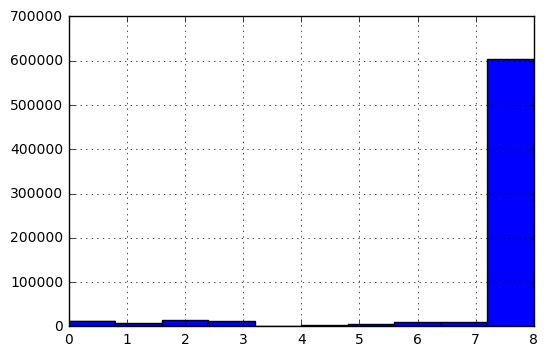

In [114]:
feature_df.iob.hist()
plt.show()

In [129]:
feature_df.iob.value_counts()

8    603067
2     14140
3     12795
0     11442
6      9608
7      9509
1      8230
5      6453
4      3133
Name: iob, dtype: int64